# Stock Price Prediction using LSTM by `Mr. Harshit Dawar`

## Importing the required Packages!

In [56]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN, GRU, Input
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Loading the Dataset

In [3]:
data = pd.read_csv("stockdata.csv")

In [4]:
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


In [6]:
data.tail()

,date,open,high,low,close,volume,Name
1254,2018-02-01,56.280,56.42,55.89,56.00,14690146,SBUX
1255,2018-02-02,55.900,56.32,55.70,55.77,15358909,SBUX
1256,2018-02-05,55.530,56.26,54.57,54.69,16059955,SBUX
1257,2018-02-06,53.685,56.06,53.56,55.61,17415065,SBUX
1258,2018-02-07,55.080,55.43,54.44,54.46,13927022,SBUX


In [13]:
data.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,48.344296,48.717212,47.956827,48.352246,9.230517e+06
std,10.389108,10.458485,10.304082,10.391867,4.382209e+06
min,26.535000,26.820000,26.260000,26.605000,2.215418e+06
25%,38.372500,38.690650,38.087750,38.355000,6.661026e+06
50%,53.520000,53.995000,53.180000,53.540000,8.138313e+06
75%,57.270000,57.735000,56.850000,57.360000,1.059388e+07
max,64.850000,64.870000,64.180000,64.570000,5.345479e+07


### Using the wrong way to predict the stock prices(this way is most followed way, which is actually wrong)!


In [49]:
# Taking only high data for demonstration purpose!
timeSeries = data["high"].values.reshape(-1, 1)

In [50]:
timeSeries.shape

(1259, 1)

In [51]:
# Normalizing the data (Fitting only half series & transforming the complete series)
# This is the use case & difference b/w using fit_transofrm() & using fit & transform seperately
scaler = StandardScaler().fit(timeSeries[: timeSeries.shape[0] // 2])
timeSeries = scaler.transform(timeSeries)

In [52]:
timeSeries.shape

(1259, 1)

In [53]:
timeSeriesData = []
forecast = []
sequenceLength = 15
Dimesnsion = timeSeries.shape[1]

for sequence in range(len(timeSeries) - sequenceLength):
    timeSeriesData.append(
        timeSeries[sequence : sequence + sequenceLength]
    )
    forecast.append(
        timeSeries[sequence + sequenceLength]
    )
    
timeSeriesData, forecast = np.array(timeSeriesData), np.array(forecast)

In [54]:
timeSeriesData.shape

(1244, 15, 1)

In [55]:
# Just playing with shapes (This cell has no relation with the project!)
timeSeriesData.reshape(-1, sequenceLength, 2).shape

(622, 15, 2)

In [57]:
inputShape = Input(shape = (sequenceLength, Dimesnsion))
LayerStack = LSTM(9)(inputShape)
LayerStack = Dense(1)(LayerStack)

LSTMModel = Model(inputShape, LayerStack)
LSTMModel.summary()

LSTMModel.compile(optimizer="adam", loss="mse")

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 15, 1)]           0         
_________________________________________________________________
lstm (LSTM)                  (None, 9)                 396       
_________________________________________________________________
dense (Dense)                (None, 1)                 10        
Total params: 406
Trainable params: 406
Non-trainable params: 0
_________________________________________________________________


In [59]:
limit = timeSeriesData.shape[0] // 2
trainedModel = LSTMModel.fit(timeSeriesData[ : limit],
                             forecast[ : limit],
                             epochs = 200,
                             validation_data = (timeSeriesData[ limit : ],
                                                forecast[ limit : ]
                             )
                            )

Train on 622 samples, validate on 622 samples
Epoch 1/200
622/622 [==============================] - 6s 10ms/sample - loss: 1.6391 - val_loss: 8.4363
Epoch 2/200
622/622 [==============================] - 1s 1ms/sample - loss: 1.2953 - val_loss: 6.7881
Epoch 3/200
622/622 [==============================] - 1s 1ms/sample - loss: 1.0367 - val_loss: 5.5719
Epoch 4/200
622/622 [==============================] - 1s 1ms/sample - loss: 0.8173 - val_loss: 4.5205
Epoch 5/200
622/622 [==============================] - 1s 1ms/sample - loss: 0.6223 - val_loss: 3.4519
Epoch 6/200
622/622 [==============================] - 1s 1ms/sample - loss: 0.4412 - val_loss: 2.5670
Epoch 7/200
622/622 [==============================] - 1s 1ms/sample - loss: 0.2978 - val_loss: 1.9013
Epoch 8/200
622/622 [==============================] - 1s 1ms/sample - loss: 0.2012 - val_loss: 1.4257
Epoch 9/200
622/622 [==============================] - 1s 1ms/sample - loss: 0.1455 - val_loss: 1.1337
Epoch 10/200
622/622 [====

622/622 [==============================] - 1s 1ms/sample - loss: 0.0082 - val_loss: 0.0459
Epoch 80/200
622/622 [==============================] - 1s 1ms/sample - loss: 0.0082 - val_loss: 0.0459
Epoch 81/200
622/622 [==============================] - 1s 1ms/sample - loss: 0.0083 - val_loss: 0.0464
Epoch 82/200
622/622 [==============================] - 1s 1ms/sample - loss: 0.0082 - val_loss: 0.0454
Epoch 83/200
622/622 [==============================] - 1s 1ms/sample - loss: 0.0080 - val_loss: 0.0449
Epoch 84/200
622/622 [==============================] - 1s 1ms/sample - loss: 0.0079 - val_loss: 0.0446
Epoch 85/200
622/622 [==============================] - 1s 1ms/sample - loss: 0.0079 - val_loss: 0.0446
Epoch 86/200
622/622 [==============================] - 1s 1ms/sample - loss: 0.0080 - val_loss: 0.0438
Epoch 87/200
622/622 [==============================] - 1s 1ms/sample - loss: 0.0078 - val_loss: 0.0436
Epoch 88/200
622/622 [==============================] - 1s 1ms/sample - loss:

622/622 [==============================] - 1s 1ms/sample - loss: 0.0055 - val_loss: 0.0277
Epoch 158/200
622/622 [==============================] - 1s 1ms/sample - loss: 0.0055 - val_loss: 0.0274
Epoch 159/200
622/622 [==============================] - 1s 1ms/sample - loss: 0.0056 - val_loss: 0.0275
Epoch 160/200
622/622 [==============================] - 1s 1ms/sample - loss: 0.0054 - val_loss: 0.0272
Epoch 161/200
622/622 [==============================] - 1s 1ms/sample - loss: 0.0054 - val_loss: 0.0268
Epoch 162/200
622/622 [==============================] - 1s 1ms/sample - loss: 0.0054 - val_loss: 0.0271
Epoch 163/200
622/622 [==============================] - 1s 1ms/sample - loss: 0.0054 - val_loss: 0.0269
Epoch 164/200
622/622 [==============================] - 1s 1ms/sample - loss: 0.0053 - val_loss: 0.0266
Epoch 165/200
622/622 [==============================] - 1s 1ms/sample - loss: 0.0053 - val_loss: 0.0262
Epoch 166/200
622/622 [==============================] - 1s 1ms/sampl

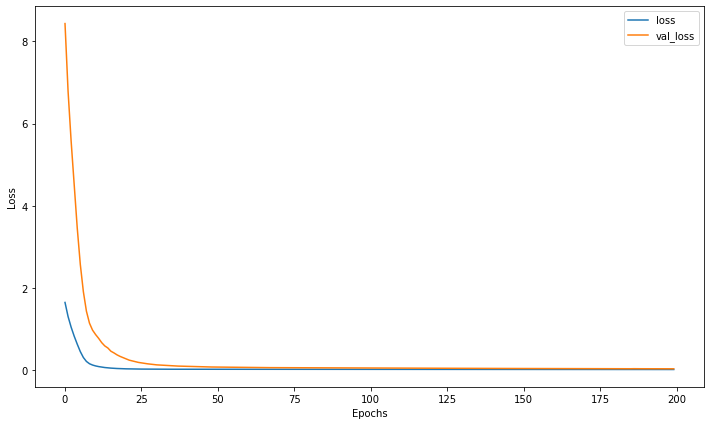

In [66]:
plt.figure(figsize = (12, 7))
plt.plot(trainedModel.history["loss"], label = "loss")
plt.plot(trainedModel.history["val_loss"], label = "val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

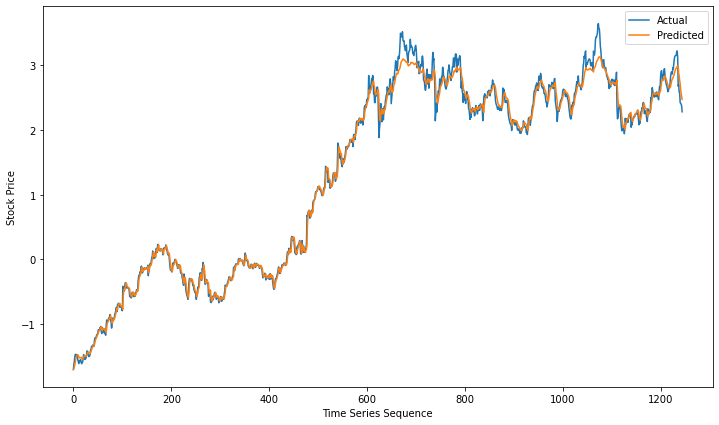

In [71]:
plt.figure(figsize = (12, 7))
plt.plot(forecast, label = "Actual")
plt.plot(LSTMModel.predict(timeSeriesData), label = "Predicted")
plt.xlabel("Time Series Sequence")
plt.ylabel("Stock Price")
plt.legend()
plt.show()